<a href="https://colab.research.google.com/github/mayankrichu/Carbon-Dioxide-emission-Change-/blob/main/Electricity%20forecasting%20using%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

%matplotlib inline

In [3]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [19]:

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

sharing


In [4]:

df= pd.read_csv('/content/drive/My Drive/AEP_hourly.csv')


In [6]:
df.head(10)
df.shape

(121273, 2)

In [7]:
dataset=df.set_index("Datetime")
dataset.index=pd.to_datetime(dataset.index)
dataset.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [8]:
dataset=df
dataset["Month"]=pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"]=pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"]=pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"]=pd.to_datetime(df["Datetime"]).dt.time.astype(str)

dataset["Week"]=pd.to_datetime(df["Datetime"]).dt.week
dataset["Day Name"]=pd.to_datetime(df["Datetime"]).dt.day_name()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [9]:
dataset=df.set_index("Datetime")
dataset.index=pd.to_datetime(dataset.index)
dataset.head()

,AEP_MW,Month,Year,Date,Time,Week,Day Name
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [10]:
print(df.Year.unique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]


Text(0.5, 1.0, 'Energy Consumption according to the Year ')

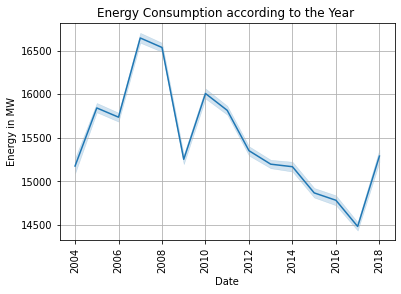

In [11]:
from matplotlib import style
fig= plt.figure()
axl= plt.subplot2grid((1,1),(0,0))
style.use('ggplot')
sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend

for label in axl.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.title("Energy Consumption according to the Year ")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy data')

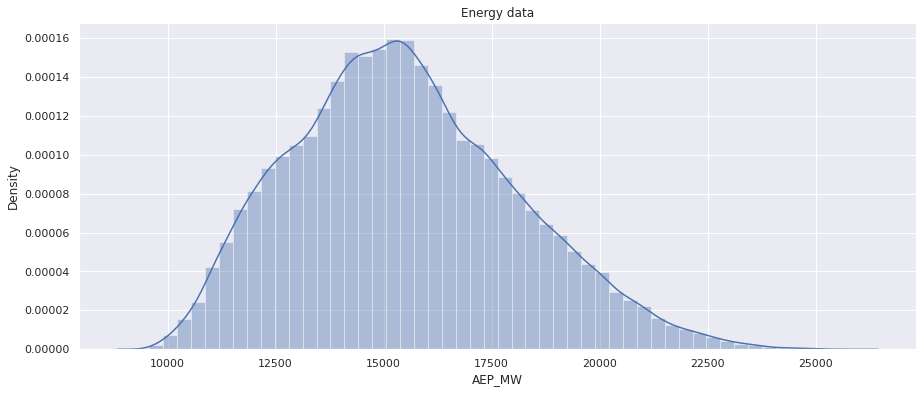

In [12]:
sns.set(rc={'figure.figsize':(15,6)})
sns.distplot(dataset["AEP_MW"])
plt.title("Energy data")



No handles with labels found to put in legend.


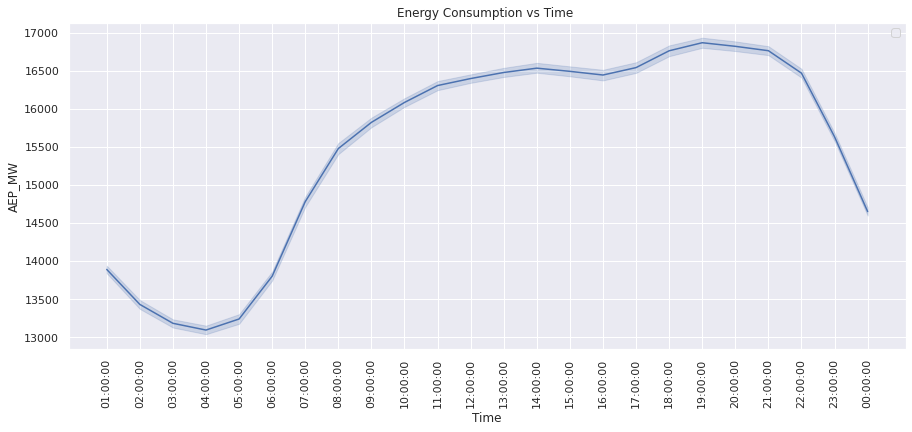

In [13]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [13]:
Newdataset=dataset.resample('D').mean()
Newdataset.head()

,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-01,14284.521739,10,2004,40
2004-10-02,12999.875000,10,2004,40
2004-10-03,12227.083333,10,2004,40
2004-10-04,14309.041667,10,2004,41
2004-10-05,14439.708333,10,2004,41


In [14]:
print("Old set", dataset.shape)
print("New Dataset",Newdataset.shape)

Old set (121273, 7)
New Dataset (5055, 4)


In [16]:
Testdata=Newdataset.tail(100)
Training_Set = Newdataset.iloc[:,0:1] #selecting the column
print(Training_Set.head()) 
Training_Set = Training_Set[:-60]

                  AEP_MW
Datetime                
2004-10-01  14284.521739
2004-10-02  12999.875000
2004-10-03  12227.083333
2004-10-04  14309.041667
2004-10-05  14439.708333


In [17]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", Testdata.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [18]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras.models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Dense

In [19]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
Train.shape[0]

4995

In [20]:
X_Train = []
Y_Train = []
for i in range(60, Train.shape[0]):
    #Difference=60 values and output = 1 value
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
print(X_Train.shape)
print(Y_Train.shape)



(4935, 60, 1)
(4935, 1)


In [21]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [48]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [49]:
model=regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32, validation_split=0.1, shuffle=False)

Epoch 1/50
139/139 [==============================] - 16s 118ms/step - loss: 0.0269 - val_loss: 0.0170
Epoch 2/50
139/139 [==============================] - 15s 108ms/step - loss: 0.0196 - val_loss: 0.0165
Epoch 3/50
139/139 [==============================] - 16s 112ms/step - loss: 0.0184 - val_loss: 0.0161
Epoch 4/50
139/139 [==============================] - 15s 109ms/step - loss: 0.0177 - val_loss: 0.0154
Epoch 5/50
139/139 [==============================] - 16s 112ms/step - loss: 0.0171 - val_loss: 0.0148
Epoch 6/50
139/139 [==============================] - 19s 135ms/step - loss: 0.0166 - val_loss: 0.0139
Epoch 7/50
139/139 [==============================] - 15s 111ms/step - loss: 0.0160 - val_loss: 0.0134
Epoch 8/50
139/139 [==============================] - 16s 113ms/step - loss: 0.0157 - val_loss: 0.0133
Epoch 9/50
139/139 [==============================] - 16s 112ms/step - loss: 0.0157 - val_loss: 0.0130
Epoch 10/50
139/139 [==============================] - 16s 117ms/step - l

In [50]:
Df_Total = pd.concat((Newdataset[["AEP_MW"]], Testdata[["AEP_MW"]]), axis=0)

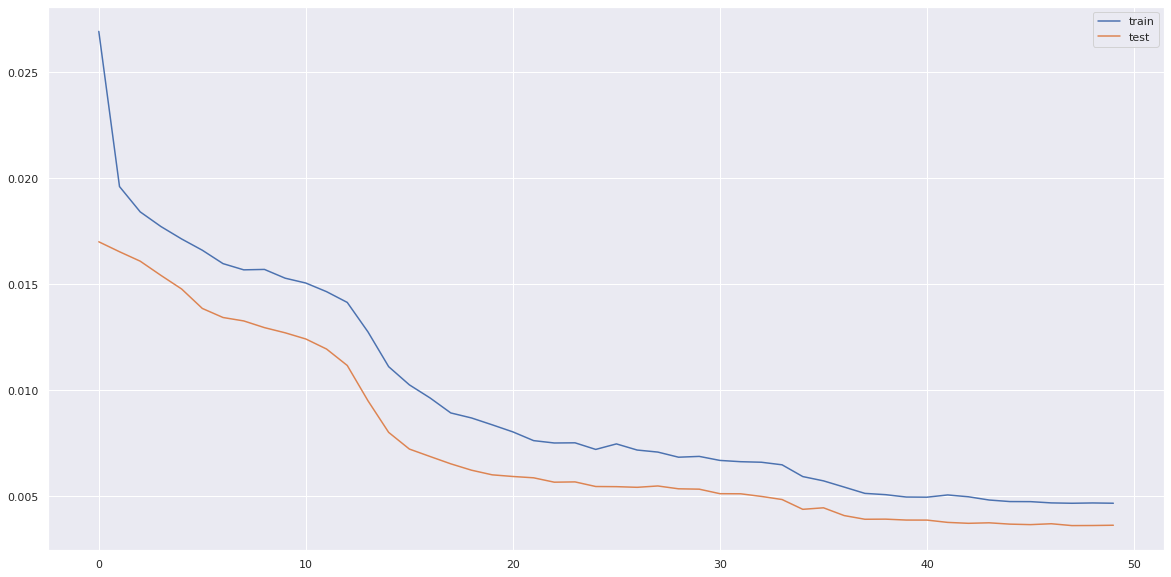

In [51]:
plt.figure(figsize=(20,10))
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.legend()

In [52]:
Df_Total.shape

Df_Total.tail()

,AEP_MW
Datetime,
2018-07-30,15368.083333
2018-07-31,15180.291667
2018-08-01,15151.166667
2018-08-02,15687.666667
2018-08-03,14809.000000


In [53]:
inputs = Df_Total[len(Df_Total) - len(Testdata) - 60:].values
# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

#Difference of 60 values and output would be 1 value
X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
   
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_megawatt = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_megawatt = sc.inverse_transform(predicted_megawatt)

In [54]:
True_MegaWatt = Testdata["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_megawatt
dates = Testdata.index.to_list()

In [55]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMegaWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [56]:
True_MegaWatt = Testdata["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = Testdata.index.to_list()



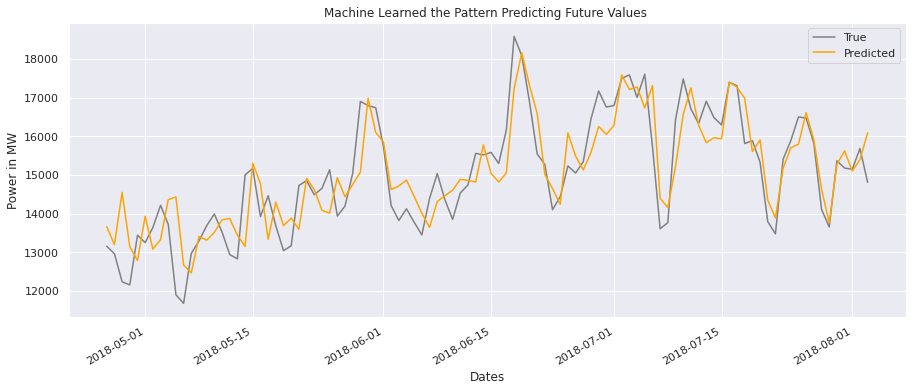

In [57]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="grey", label= "True")
plt.plot(x,y1, color="orange", label ="Predicted")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()